# Importing Libraries and Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('database.csv', parse_dates=['Date'])

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02 00:00:00,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04 00:00:00,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05 00:00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08 00:00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09 00:00:00,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# Explanatory Data Analysis

In [4]:
df.shape

(23412, 21)

In [5]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [7]:
df.isna().mean().sort_values(ascending=False) * 100

Magnitude Error               98.603280
Horizontal Error              95.062361
Horizontal Distance           93.148813
Magnitude Seismic Stations    89.048351
Depth Error                   80.945669
Depth Seismic Stations        69.686486
Azimuthal Gap                 68.823680
Root Mean Square              25.884162
Magnitude Type                 0.012814
Magnitude Source               0.000000
Location Source                0.000000
Source                         0.000000
ID                             0.000000
Date                           0.000000
Time                           0.000000
Magnitude                      0.000000
Depth                          0.000000
Type                           0.000000
Longitude                      0.000000
Latitude                       0.000000
Status                         0.000000
dtype: float64

**Dropping the columns that have significant amount of null values**

In [8]:
df = df.drop(['Magnitude Error', 'Horizontal Error', 'Horizontal Distance', 'Magnitude Seismic Stations',
             'Depth Error', 'Depth Seismic Stations', 'Azimuthal Gap', 'Root Mean Square'], axis=1)

In [9]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02 00:00:00,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04 00:00:00,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05 00:00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08 00:00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09 00:00:00,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [10]:
# Splitting the columns according to their data types
date_cols = ['Date', 'Time']
cat_cols = ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source', 'Status']
num_cols = ['Depth', 'Magnitude']

## Univariate Analysis

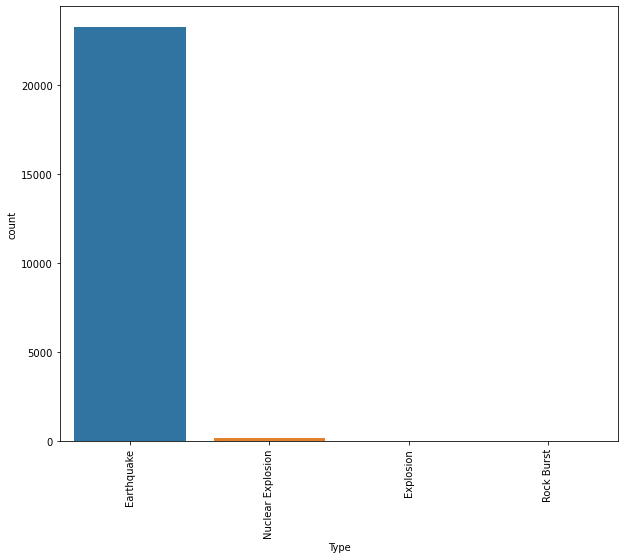

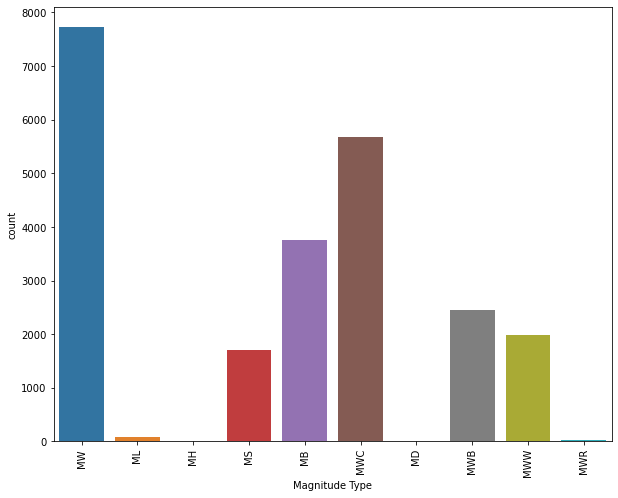

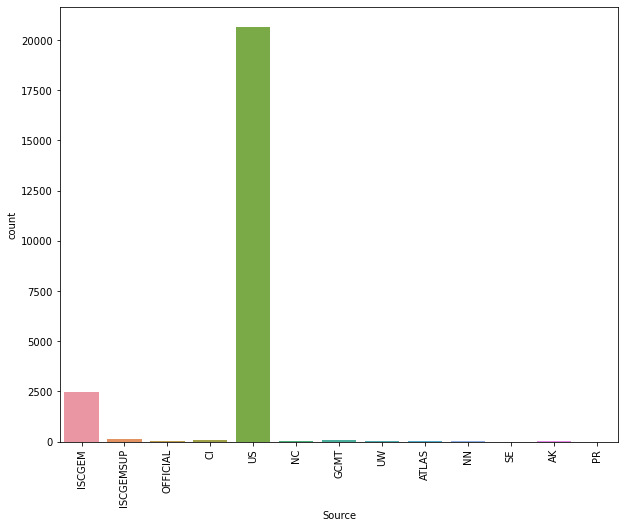

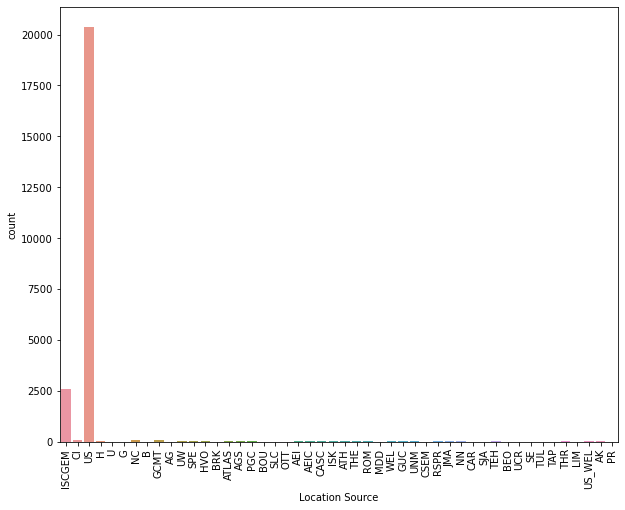

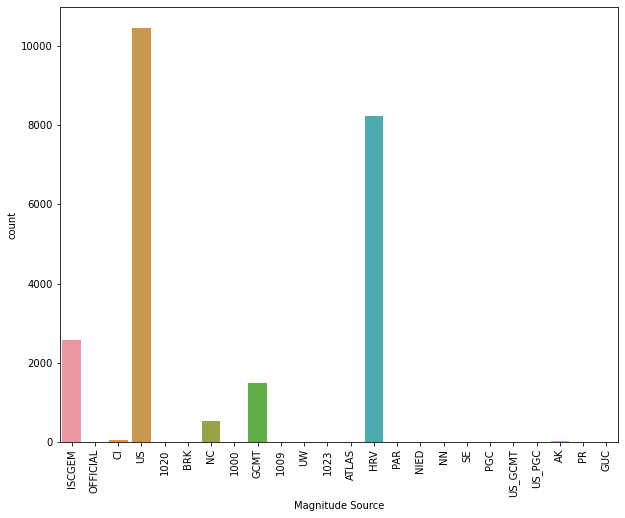

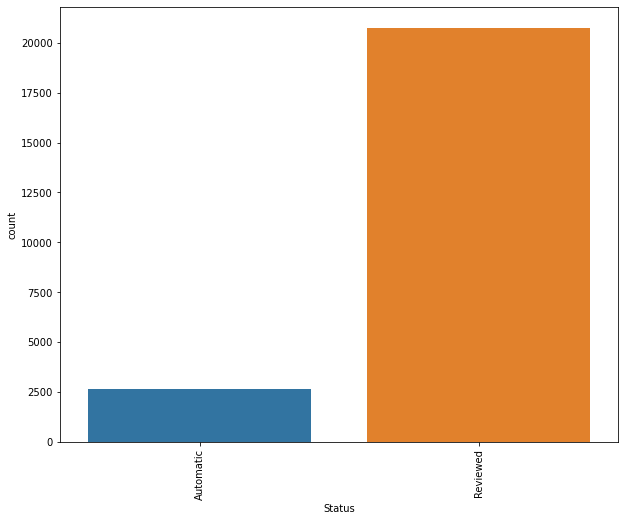

In [11]:
for cat in cat_cols:
    plt.figure(figsize=(10, 8))
    sns.countplot(x=cat, data=df)
    plt.xticks(rotation=90)
    plt.show()

In [12]:
df[cat_cols].nunique()

Type                 4
Magnitude Type      10
Source              13
Location Source     48
Magnitude Source    24
Status               2
dtype: int64

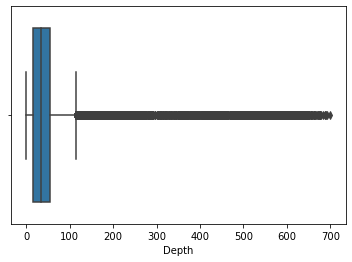

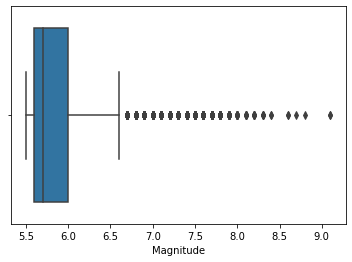

In [13]:
for num in num_cols:
    sns.boxplot(x=num, data=df)
    plt.show()

**Checking the correlation between the depth and the Magnitude**

In [14]:
df[['Depth', 'Magnitude']].corr()

,Depth,Magnitude
Depth,1.000000,0.023457
Magnitude,0.023457,1.000000


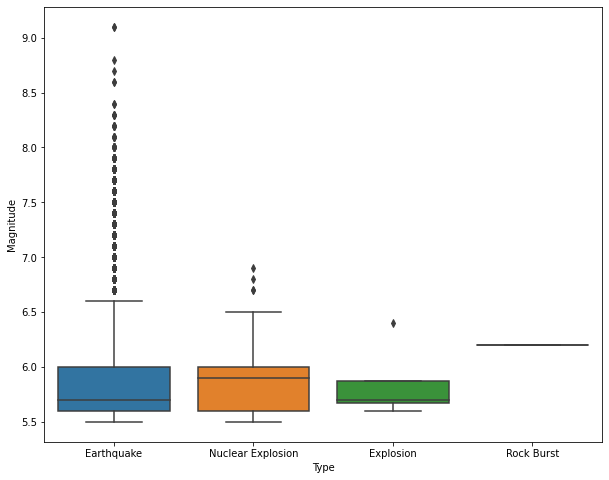

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Type', y='Magnitude', data=df);

## Multivariate Analysis

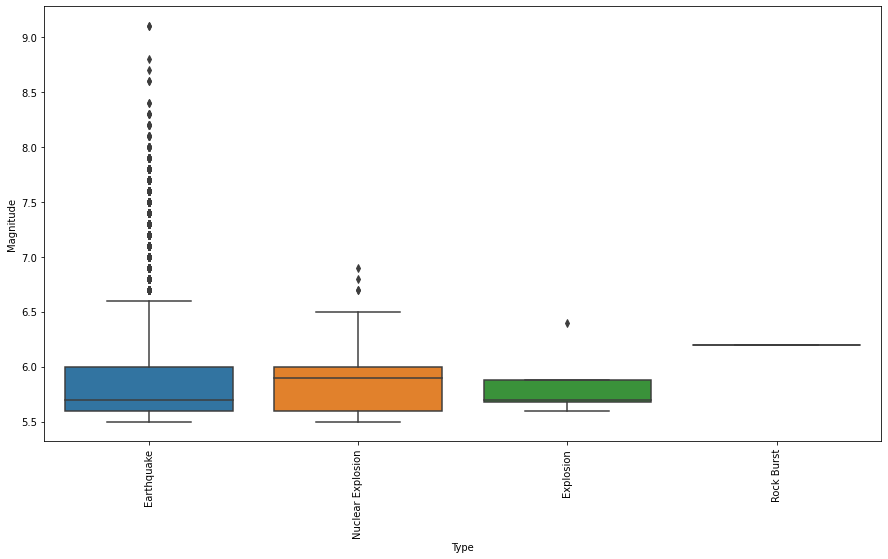

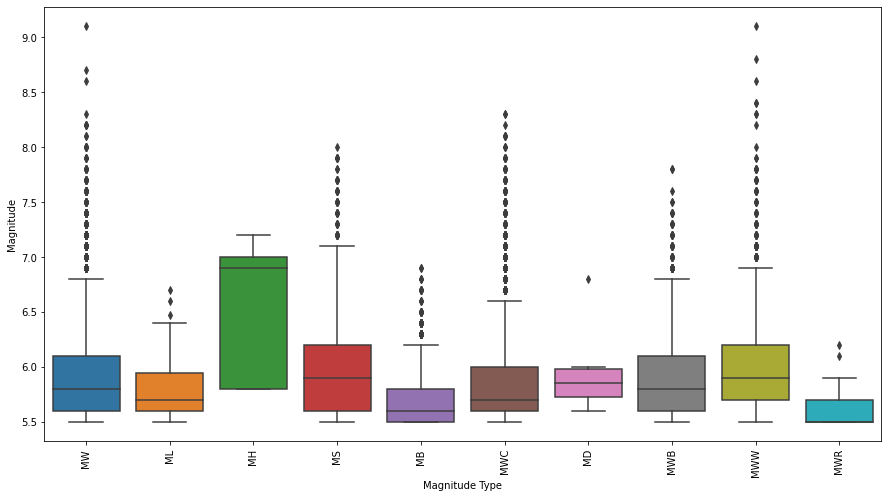

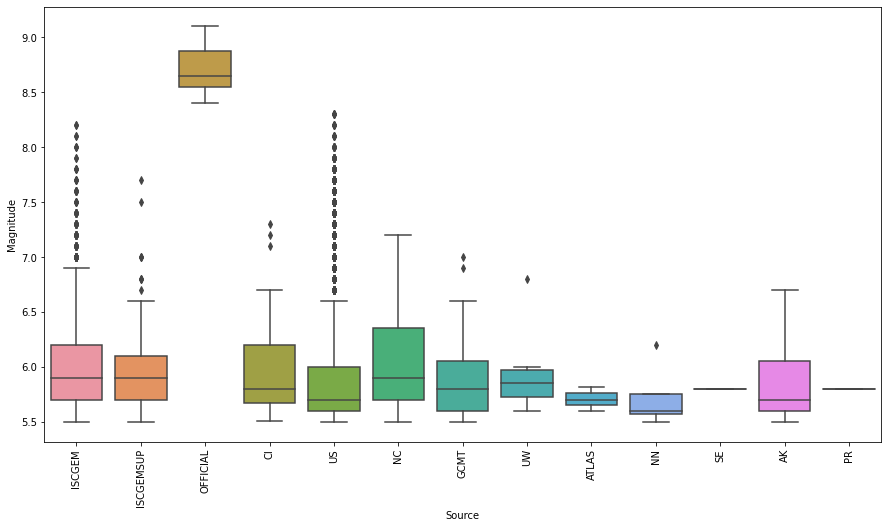

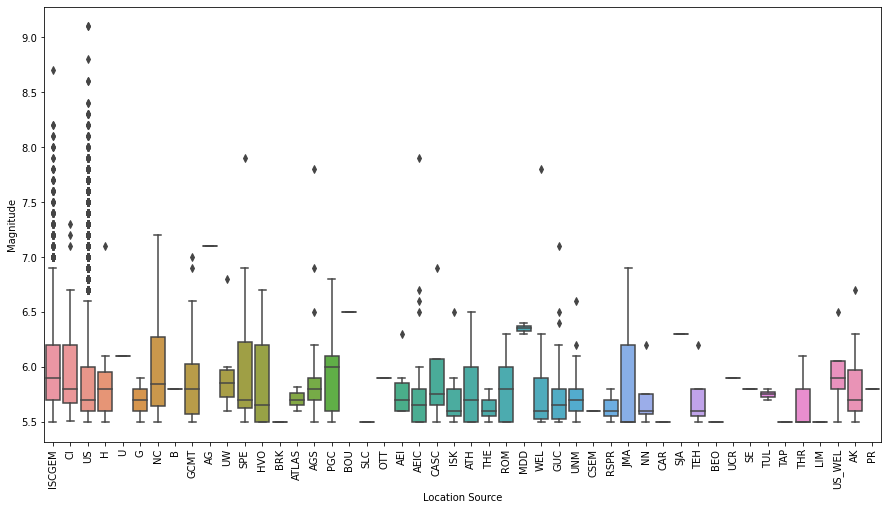

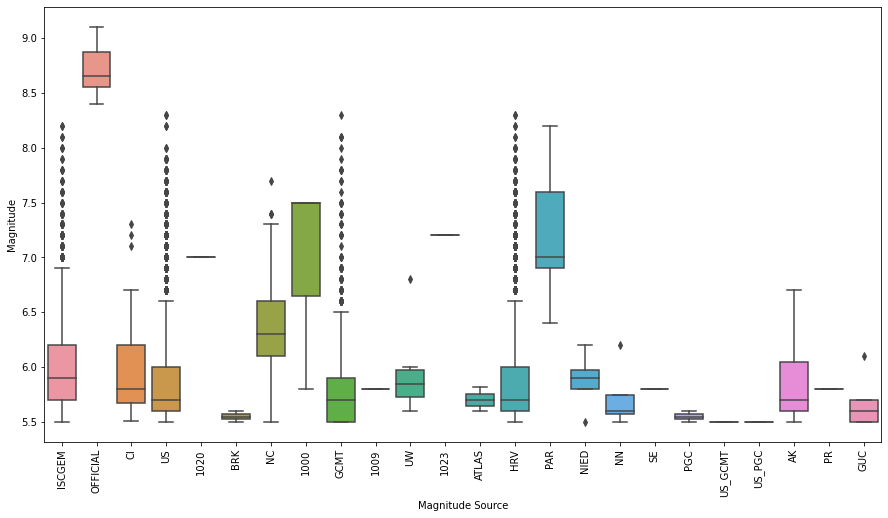

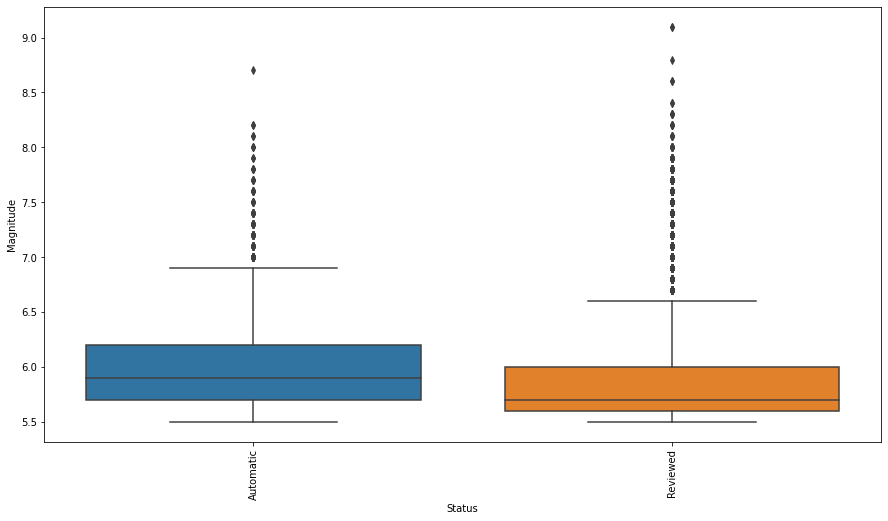

In [16]:
# Checking the magnitude with the categorical features
for cat in cat_cols:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x=cat, y='Magnitude', data=df)
    plt.xticks(rotation=90)
    plt.show()

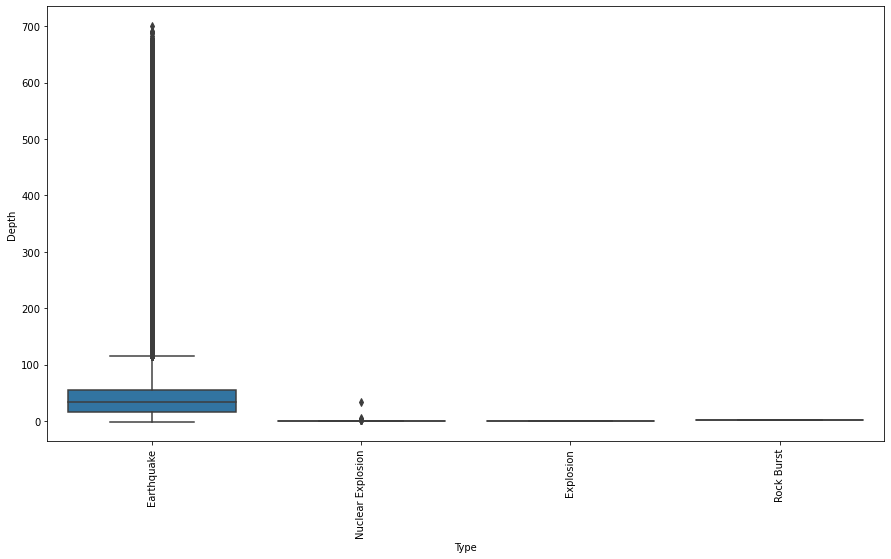

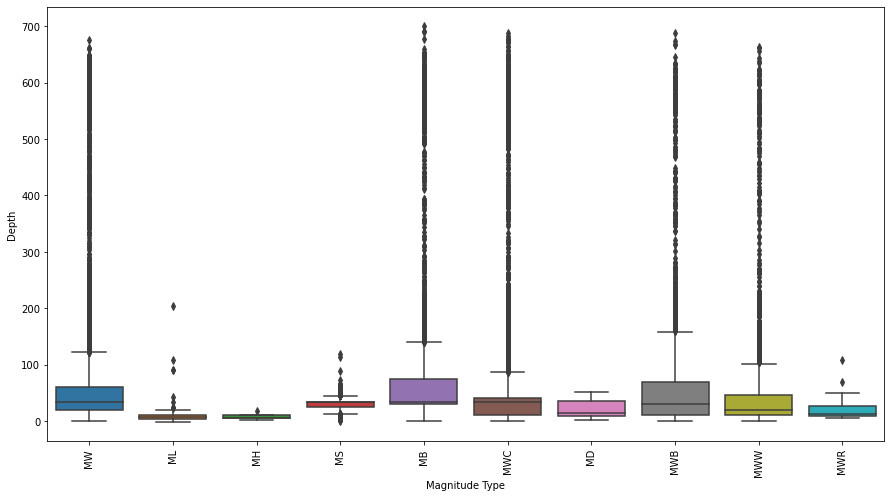

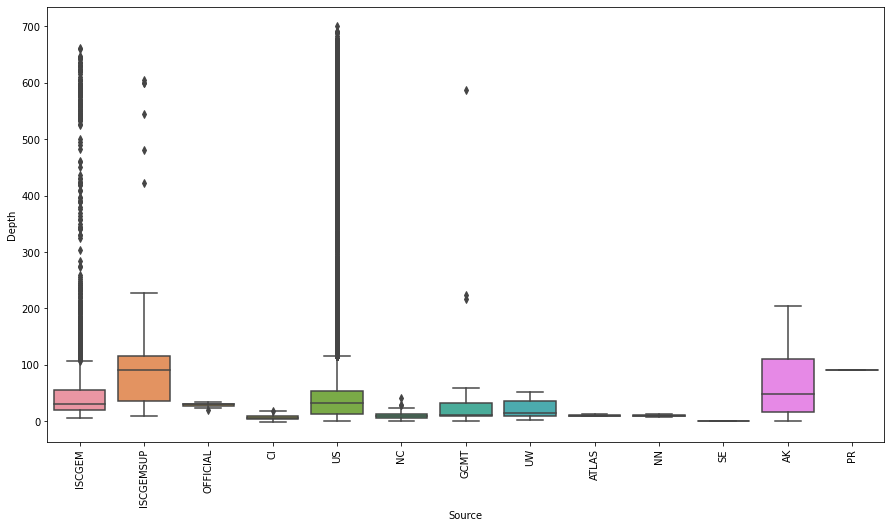

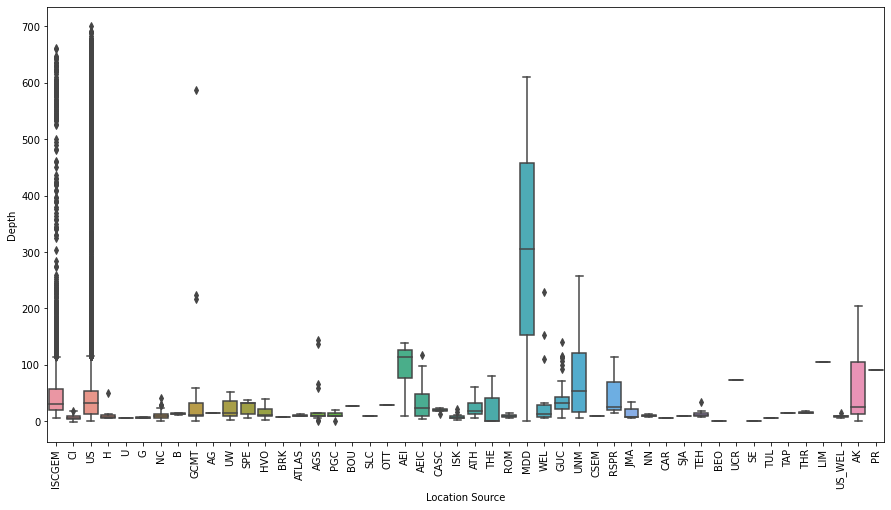

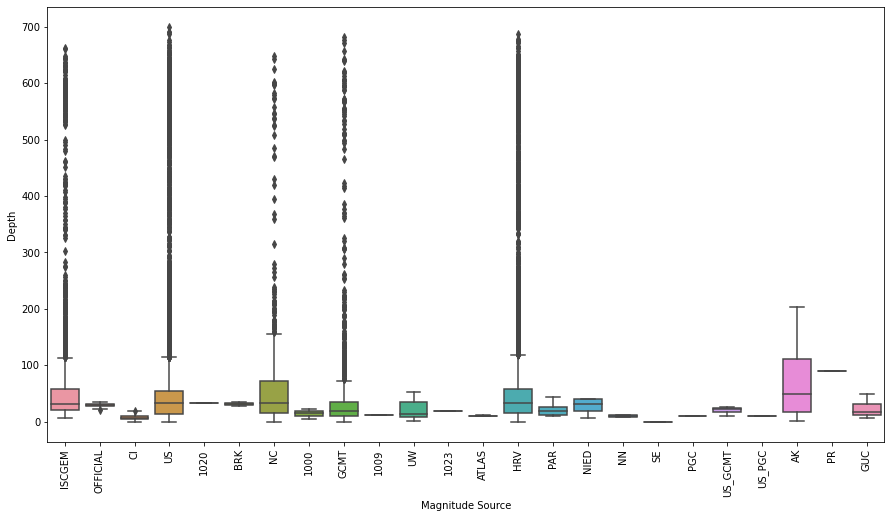

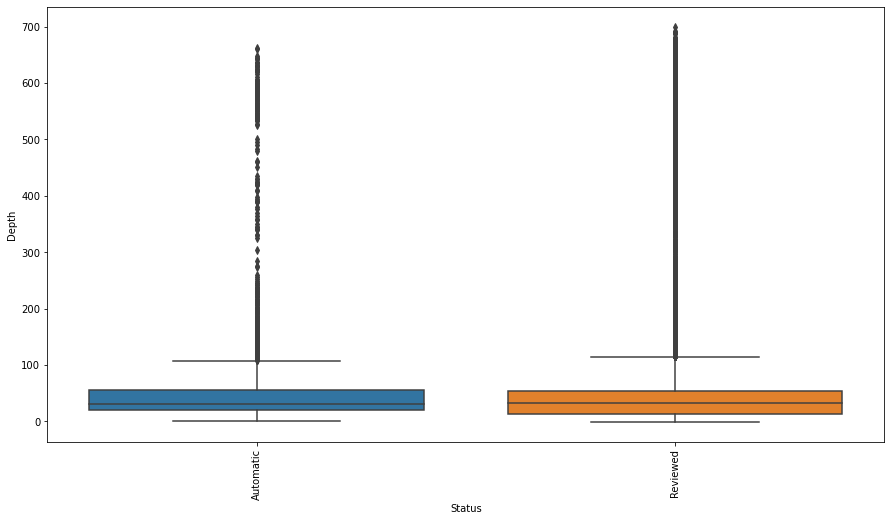

In [17]:
for cat in cat_cols:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x=cat, y='Depth', data=df)
    plt.xticks(rotation=90)
    plt.show()

**Extracting Date features**

In [18]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02 00:00:00,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04 00:00:00,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05 00:00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08 00:00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09 00:00:00,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [19]:
def extract_data_features(df):
    df['Year'] = df['Date'].apply(lambda date: date.year)
    df['Month'] = df['Date'].apply(lambda date: date.month)
    df['WeekDay'] = df['Date'].apply(lambda date: date.weekday())
    df['Hour'] = df['Time'].apply(lambda time: time[:2])
    
    month_dict = {
        1: 'Jan',
        2: 'Feb',
        3: 'Mar',
        4: 'Apr',
        5: 'May',
        6: 'Jun',
        7: 'Jul',
        8: 'Aug',
        9: 'Sep',
        10: 'Oct',
        11: 'Nov',
        12: 'Dec'
    }
    
    day_of_week = {
        1: 'Mon',
        2: 'Tue',
        3: 'Wed',
        4: 'Thur',
        5: 'Fri',
        6: 'Sat',
        0: 'Sun'
    }
    
    df['Month'] = df['Month'].map(month_dict)
    df['WeekDay'] = df['WeekDay'].map(day_of_week)
    
    return df

In [20]:
df = extract_data_features(df)

In [21]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,Year,Month,WeekDay,Hour
0,1965-01-02 00:00:00,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,Jan,Fri,13
1,1965-01-04 00:00:00,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,Jan,Sun,11
2,1965-01-05 00:00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,Jan,Mon,18
3,1965-01-08 00:00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,Jan,Thur,18
4,1965-01-09 00:00:00,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,Jan,Fri,13


**Selecting a subset of the dataset where type is Earthquake**

In [27]:
df = df[df['Type']=='Earthquake']

In [28]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,Year,Month,WeekDay,Hour
0,1965-01-02 00:00:00,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,Jan,Fri,13
1,1965-01-04 00:00:00,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,Jan,Sun,11
2,1965-01-05 00:00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,Jan,Mon,18
3,1965-01-08 00:00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,Jan,Thur,18
4,1965-01-09 00:00:00,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,Jan,Fri,13


**Selecting the relevant columns for modelling**

In [29]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude',
       'Magnitude Type', 'ID', 'Source', 'Location Source', 'Magnitude Source',
       'Status', 'Year', 'Month', 'WeekDay', 'Hour'],
      dtype='object')

In [30]:
df = df[['Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'Magnitude Type', 'Magnitude Source',
        'Status', 'Year', 'Month', 'WeekDay', 'Hour']]

In [31]:
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Magnitude Source,Status,Year,Month,WeekDay,Hour
0,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM,Automatic,1965,Jan,Fri,13
1,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM,Automatic,1965,Jan,Sun,11
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM,Automatic,1965,Jan,Mon,18
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM,Automatic,1965,Jan,Thur,18
4,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM,Automatic,1965,Jan,Fri,13


**The target variable will be depth**

In [32]:
# Setting the independent and dependent variables
X = df.drop('Depth', axis=1)
y = df['Depth']

In [41]:
# one hot encoding the categorical features
X = pd.get_dummies(X, drop_first=True)

**Splitting the data to train and test**

In [33]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
# scaling the values
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning

## Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
linear_model = LinearRegression()

In [47]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Getting the predictions
linear_pred = linear_model.predict(X_test)

In [49]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [50]:
# Checking how well the model performs
rmse(y_test, linear_pred)

264778619252.39075

## RandomForest

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rand_regr = RandomForestRegressor()

In [53]:
rand_regr.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
rand_pred = rand_regr.predict(X_test)

In [55]:
# Checking how well Random Forest does
rmse(y_test, rand_pred)

49.468625801100615

## XGBOOST

In [56]:
from xgboost import XGBRegressor

In [57]:
xg_regr = XGBRegressor().fit(X_train, y_train)

In [58]:
xg_pred = xg_regr.predict(X_test)

In [59]:
rmse(y_test, xg_pred)

52.62507300562935

**While trying to predict the Depth.** 

**Among LinearRegression, RandomForest and Xgboost, RandomForest yielded the best rmse score**